In [50]:
import pandas as pd
import sqlite3
import gzip
import shutil
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

with gzip.open('zippedData/tn.movie_budgets.csv.gz', 'rb') as f_in:
        with open('tn.movie_budgets.csv', 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

import zipfile
with zipfile.ZipFile('zippedData/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('unzippedData/')

In [2]:
movie_gross = pd.read_csv('unzippedData/bom.movie_gross.csv')

In [3]:
imdb_df = pd.read_csv('unzippedData/imdb_movies.csv')

In [4]:
movie_budgets = pd.read_csv('unzippedData/tn.movie_budgets.csv')

In [5]:
tmdb = pd.read_csv('unzippedData/tmdb.movies.csv')

In [6]:
rt_score = pd.read_csv('unzippedData/rt.reviews.tsv', sep = '\t', encoding = ('latin-1') )

In [7]:
rt_info = pd.read_csv('unzippedData/rt.movie_info.tsv',sep = '\t')

In [8]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [9]:
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [10]:
rt_info['rating'].value_counts()

R        521
NR       503
PG       240
PG-13    235
G         57
NC17       1
Name: rating, dtype: int64

In [11]:
rt_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [12]:
conn = sqlite3.connect('unzippedData/im.db')

In [13]:
movie_basics = pd.read_sql("""
SELECT *

FROM 
    movie_ratings AS mr
    INNER JOIN movie_basics AS mb
    USING (movie_id)
WHERE
    numvotes > 500

""",conn)

In [14]:
movie_basics.groupby('genres').size()

genres
Action                        100
Action,Adventure               27
Action,Adventure,Animation     83
Action,Adventure,Biography      9
Action,Adventure,Comedy       112
                             ... 
Thriller                      185
Thriller,War                    1
Thriller,Western                2
War                             3
Western                         8
Length: 567, dtype: int64

In [15]:
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13880 entries, 0 to 13879
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         13880 non-null  object 
 1   averagerating    13880 non-null  float64
 2   numvotes         13880 non-null  int64  
 3   primary_title    13880 non-null  object 
 4   original_title   13880 non-null  object 
 5   start_year       13880 non-null  int64  
 6   runtime_minutes  13827 non-null  float64
 7   genres           13877 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 867.6+ KB


In [16]:
movie_budgets['production_budget'] = movie_budgets['production_budget'].str.strip('$').str.replace(",","").astype(int)




In [17]:
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.strip('$').str.replace(",", "").astype(float)


In [18]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   int32  
 4   domestic_gross     5782 non-null   object 
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(1), int32(1), int64(1), object(3)
memory usage: 248.6+ KB


In [19]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,"$760,507,625",2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875",1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000,"$42,762,350",1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,"$459,005,868",1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,"$620,181,382",1.316722e+09


In [20]:
#ratings
    #-Gen
#money

In [21]:
mega_df = movie_basics.merge(movie_budgets, left_on = 'primary_title', right_on = 'movie', how = 'inner')

In [22]:
mega_df.head()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",42,"Jan 10, 2014",The Legend of Hercules,70000000,"$18,848,538",58953319.0
1,tt1094666,7.0,1613,The Hammer,Hamill,2010,108.0,"Biography,Drama,Sport",50,"Mar 21, 2008",The Hammer,850000,"$442,638",442638.0
2,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,38,"Sep 27, 2013",Baggage Claim,8500000,"$21,569,509",22885836.0
3,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",15,"Sep 23, 2011",Moneyball,50000000,"$75,605,492",111300835.0
4,tt1212419,6.5,87288,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance",61,"Oct 15, 2010",Hereafter,50000000,"$32,746,941",108660270.0


mega_df['Action'] = mega_df['genres'].str.contains('Action')

mega_df['Adventure'] = mega_df['genres'].str.contains('Adventure')
mega_df['Comedy'] = mega_df['genres'].str.contains('Comedy')
mega_df['Family'] = mega_df['genres'].str.contains('Family')
mega_df['Crime'] = mega_df['genres'].str.contains('Crime')
mega_df['Thriller'] = mega_df['genres'].str.contains('Thriller')
mega_df['Sport'] = mega_df['genres'].str.contains('Sport')
mega_df['Animation'] = mega_df['genres'].str.contains('Animation')
mega_df['Horror'] = mega_df['genres'].str.contains('Horror')
mega_df['Fantasy'] = mega_df['genres'].str.contains('Fantasy')
mega_df['Romance'] = mega_df['genres'].str.contains('Romance')
mega_df['Sci-Fi'] = mega_df['genres'].str.contains('Sci-Fi')
mega_df['Sport'] = mega_df['genres'].str.contains('Sport')
mega_df['Documentary'] = mega_df['genres'].str.contains('Documentary')
mega_df['History'] = mega_df['genres'].str.contains('History')
mega_df['Music'] = mega_df['genres'].str.contains('Music')
mega_df['Mystery'] = mega_df['genres'].str.contains('Mystery')
mega_df['Drama'] = mega_df['genres'].str.contains('Drama')
mega_df['War'] = mega_df['genres'].str.contains('War')
mega_df['Biography'] = mega_df['genres'].str.contains('Biography')
mega_df['Musical'] = mega_df['genres'].str.contains('Musical')


                                                   

                                                   



In [23]:
genre_list = ['Adventure', 'Comedy', 'Family', 'Crime', 'Thriller', 'Sport', 'Animation',
              'Horror', 'Fantasy', 'Romance', 'Sci-Fi', 'Documentary', 'History', 'Music',
              'Mystery', 'Drama', 'War', 'Biography', 'Musical','Action']

for genre in genre_list:
    mega_df[genre] = mega_df['genres'].str.contains(genre)

mega_df['Profit'] = mega_df['worldwide_gross'] - mega_df['production_budget']

# Split the genres column into a list of genres
mega_df['genres'] = mega_df['genres'].str.split(',')


In [24]:
mega_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1933 entries, 0 to 1932
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           1933 non-null   object 
 1   averagerating      1933 non-null   float64
 2   numvotes           1933 non-null   int64  
 3   primary_title      1933 non-null   object 
 4   original_title     1933 non-null   object 
 5   start_year         1933 non-null   int64  
 6   runtime_minutes    1932 non-null   float64
 7   genres             1933 non-null   object 
 8   id                 1933 non-null   int64  
 9   release_date       1933 non-null   object 
 10  movie              1933 non-null   object 
 11  production_budget  1933 non-null   int32  
 12  domestic_gross     1933 non-null   object 
 13  worldwide_gross    1933 non-null   float64
 14  Adventure          1933 non-null   bool   
 15  Comedy             1933 non-null   bool   
 16  Family             1933 

In [25]:
mega_df['Profit'] = mega_df['worldwide_gross'] - mega_df['production_budget']

In [26]:
mega_df.to_csv('unzippedData/megadf4.csv')

In [27]:
mega_df.head()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,...,Documentary,History,Music,Mystery,Drama,War,Biography,Musical,Action,Profit
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",42,"Jan 10, 2014",...,False,False,False,False,False,False,False,False,True,-11046681.0
1,tt1094666,7.0,1613,The Hammer,Hamill,2010,108.0,"Biography,Drama,Sport",50,"Mar 21, 2008",...,False,False,False,False,True,False,True,False,False,-407362.0
2,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,38,"Sep 27, 2013",...,False,False,False,False,False,False,False,False,False,14385836.0
3,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",15,"Sep 23, 2011",...,False,False,False,False,True,False,True,False,False,61300835.0
4,tt1212419,6.5,87288,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance",61,"Oct 15, 2010",...,False,False,False,False,True,False,False,False,False,58660270.0


In [28]:
mega_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1933 entries, 0 to 1932
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           1933 non-null   object 
 1   averagerating      1933 non-null   float64
 2   numvotes           1933 non-null   int64  
 3   primary_title      1933 non-null   object 
 4   original_title     1933 non-null   object 
 5   start_year         1933 non-null   int64  
 6   runtime_minutes    1932 non-null   float64
 7   genres             1933 non-null   object 
 8   id                 1933 non-null   int64  
 9   release_date       1933 non-null   object 
 10  movie              1933 non-null   object 
 11  production_budget  1933 non-null   int32  
 12  domestic_gross     1933 non-null   object 
 13  worldwide_gross    1933 non-null   float64
 14  Adventure          1933 non-null   bool   
 15  Comedy             1933 non-null   bool   
 16  Family             1933 

In [29]:
imdb_df.loc[(imdb_df['names'] == 'Whiplash')]


,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
991,Whiplash,10/22/2014,84.0,"Drama, Music","Under the direction of a ruthless instructor, ...","Miles Teller, Andrew Neiman, J.K. Simmons, Ter...",Whiplash,Released,English,3300000.0,39123993.0,AU


In [30]:
merged_df = pd.merge(imdb_df, mega_df, left_on='orig_title', right_on='original_title', how='inner')

In [31]:
imdb_df.head(20)

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US
5,Cocaine Bear,02/23/2023,66.0,"Thriller, Comedy, Crime","Inspired by a true story, an oddball group of ...","Keri Russell, Sari, Alden Ehrenreich, Eddie, O...",Cocaine Bear,Released,English,35000000.0,8.000000e+07,AU
6,John Wick: Chapter 4,03/23/2023,80.0,"Action, Thriller, Crime","With the price on his head ever increasing, Jo...","Keanu Reeves, John Wick, Donnie Yen, Caine, Bi...",John Wick: Chapter 4,Released,English,100000000.0,3.513494e+08,AU
7,Puss in Boots: The Last Wish,12/26/2022,83.0,"Animation, Family, Fantasy, Adventure, Comedy",Puss in Boots discovers that his passion for a...,"Antonio Banderas, Puss in Boots (voice), Salma...",Puss in Boots: The Last Wish,Released,English,90000000.0,4.834806e+08,AU
8,Attack on Titan,09/30/2022,59.0,"Action, Science Fiction","As viable water is depleted on Earth, a missio...","Paul Bianchi, Computer (voice), Erin Coker, Al...",Attack on Titan,Released,English,71000000.0,2.549465e+08,US
9,The Park,03/02/2023,58.0,"Action, Drama, Horror, Science Fiction, Thriller",A dystopian coming-of-age movie focused on thr...,"Chloe Guidry, Ines, Nhedrick Jabier, Bui, Carm...",The Park,Released,English,119200000.0,4.889625e+08,US


In [32]:
imdb_df.loc[imdb_df['names']== 'Avatar']

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
68,Avatar,12/17/2009,76.0,"Action, Adventure, Fantasy, Science Fiction","In the 22nd century, a paraplegic Marine is di...","Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar,Released,English,237000000.0,2.923706e+09,AU


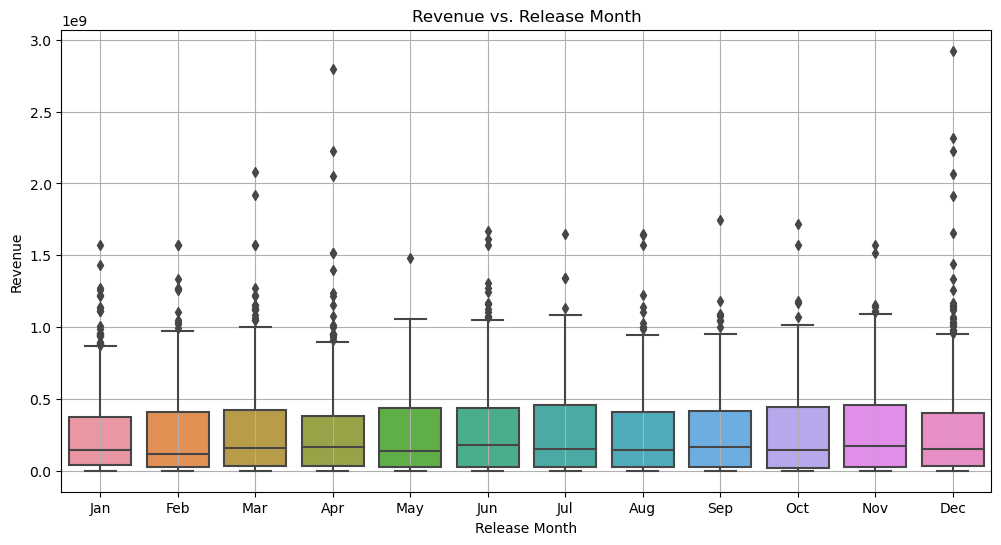

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have the merged_df as mentioned in the previous response.

# Extract the month from the release_date column and create a new column for it.
imdb_df['Release_Month'] = pd.to_datetime(imdb_df['date_x']).dt.month

# Create a scatter plot to compare Profit with the release month.
plt.figure(figsize=(12, 6))
sns.boxplot(data=imdb_df,x='Release_Month', y='revenue')
plt.title('Revenue vs. Release Month')
plt.xlabel('Release Month')
plt.ylabel('Revenue')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)

# Show the plot
plt.show()


In [57]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   names            10178 non-null  object 
 1   date_x           10178 non-null  object 
 2   score            10178 non-null  float64
 3   genre            10093 non-null  object 
 4   overview         10178 non-null  object 
 5   crew             10122 non-null  object 
 6   orig_title       10178 non-null  object 
 7   status           10178 non-null  object 
 8   orig_lang        10178 non-null  object 
 9   budget_x         10178 non-null  float64
 10  revenue          10178 non-null  float64
 11  country          10178 non-null  object 
 12  Release_Month    10178 non-null  int64  
 13  Adventure        10093 non-null  object 
 14  Comedy           10093 non-null  object 
 15  Family           10093 non-null  object 
 16  Crime            10093 non-null  object 
 17  Thriller    

In [81]:
#List of genres you want to create indicator columns for
genre_list = ['Adventure', 'Comedy', 'Family', 'Crime', 'Thriller', 'Animation',
              'Horror', 'Fantasy', 'Romance', 'Science Fiction', 'Documentary', 'History', 'Music',
              'Mystery', 'Drama', 'War', 'Action']

#Create indicator columns for each genre
for genre in genre_list:
    imdb_df[genre] = imdb_df['genre'].str.contains(genre)

In [58]:
imdb_df['profit'] =  imdb_df['revenue'] - imdb_df['budget_x']

In [71]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   names            10178 non-null  object 
 1   date_x           10178 non-null  object 
 2   score            10178 non-null  float64
 3   genre            10093 non-null  object 
 4   overview         10178 non-null  object 
 5   crew             10122 non-null  object 
 6   orig_title       10178 non-null  object 
 7   status           10178 non-null  object 
 8   orig_lang        10178 non-null  object 
 9   budget_x         10178 non-null  float64
 10  revenue          10178 non-null  float64
 11  country          10178 non-null  object 
 12  Release_Month    10178 non-null  int64  
 13  Adventure        10093 non-null  object 
 14  Comedy           10093 non-null  object 
 15  Family           10093 non-null  object 
 16  Crime            10093 non-null  object 
 17  Thriller    

In [70]:
imdb_df.groupby(['Adventure', 'Release_Month']).groups

{(False, 3): [0, 4, 6, 9, 12, 23, 24, 28, 31, 37, 54, 61, 67, 70, 71, 86, 106, 111, 121, 130, 131, 149, 152, 175, 194, 197, 207, 219, 221, 222, 225, 226, 243, 253, 259, 282, 300, 317, 346, 364, 369, 376, 392, 413, 424, 439, 443, 445, 456, 484, 488, 533, 553, 564, 583, 587, 629, 666, 688, 707, 709, 714, 723, 724, 725, 732, 739, 774, 779, 785, 795, 833, 837, 847, 848, 851, 873, 875, 900, 911, 923, 928, 945, 958, 964, 969, 972, 1001, 1016, 1048, 1058, 1089, 1097, 1098, 1099, 1106, 1126, 1129, 1149, 1175, ...], (False, 5): [35, 39, 58, 62, 117, 166, 239, 240, 265, 292, 390, 442, 448, 534, 542, 546, 558, 621, 651, 678, 685, 693, 700, 717, 733, 736, 741, 772, 800, 819, 927, 1011, 1054, 1066, 1071, 1078, 1079, 1080, 1108, 1110, 1125, 1142, 1240, 1264, 1282, 1291, 1299, 1311, 1318, 1344, 1383, 1385, 1386, 1438, 1470, 1508, 1524, 1682, 1696, 1726, 1728, 1746, 1780, 1815, 1818, 1828, 1838, 1869, 1872, 1875, 1931, 1936, 1944, 1947, 1975, 2002, 2045, 2064, 2071, 2074, 2085, 2093, 2096, 2103, 2150,

In [88]:
genre_list = ['Adventure', 'Comedy', 'Family', 'Crime', 'Thriller', 'Animation',
              'Horror', 'Fantasy', 'Romance', 'Science Fiction', 'Documentary', 'History', 'Music',
              'Mystery', 'Drama', 'War']

genre_means = {}
for genre in genre_list:
    genre_means = imdb_df[imdb_df[genre] == True].groupby('Release_Month')['profit'].mean()


In [93]:
for genre in genre_list:
    genre_means = imdb_df[imdb_df[genre] == True].groupby('Release_Month')['profit'].mean()
    genre_dict[genre] = genre_means
genre_dict

{'Adventure': Release_Month
 1     1.357168e+08
 2     2.019182e+08
 3     1.976647e+08
 4     1.807996e+08
 5     2.863126e+08
 6     2.474585e+08
 7     2.059799e+08
 8     1.976338e+08
 9     1.784086e+08
 10    2.272179e+08
 11    2.631116e+08
 12    2.526041e+08
 Name: profit, dtype: float64,
 'Comedy': Release_Month
 1     1.522123e+08
 2     2.012558e+08
 3     1.952336e+08
 4     1.504746e+08
 5     1.718098e+08
 6     2.056977e+08
 7     1.998476e+08
 8     1.771841e+08
 9     1.874942e+08
 10    1.987824e+08
 11    1.979670e+08
 12    1.744554e+08
 Name: profit, dtype: float64,
 'Family': Release_Month
 1     2.198228e+08
 2     2.465013e+08
 3     2.265416e+08
 4     1.580871e+08
 5     2.409233e+08
 6     2.692270e+08
 7     2.513072e+08
 8     2.766973e+08
 9     2.103943e+08
 10    2.784210e+08
 11    2.619540e+08
 12    2.175919e+08
 Name: profit, dtype: float64,
 'Crime': Release_Month
 1     1.388870e+08
 2     1.388627e+08
 3     1.295851e+08
 4     1.334888e+08
 5   

In [83]:
imdb_df[imdb_df['Action'] == True].groupby('Release_Month')['profit'].mean()

Release_Month
1     1.354905e+08
2     1.731235e+08
3     1.814851e+08
4     1.877438e+08
5     2.106944e+08
6     2.054387e+08
7     1.805055e+08
8     1.643820e+08
9     1.560007e+08
10    1.931967e+08
11    1.728851e+08
12    2.165483e+08
Name: profit, dtype: float64

In [89]:
print(genre_means)

Release_Month
1     1.249754e+08
2     1.527126e+08
3     1.189526e+08
4     9.231988e+07
5     1.257677e+08
6     1.594660e+08
7     9.863867e+07
8     1.195311e+08
9     1.266737e+08
10    1.509903e+08
11    1.577246e+08
12    1.390195e+08
Name: profit, dtype: float64


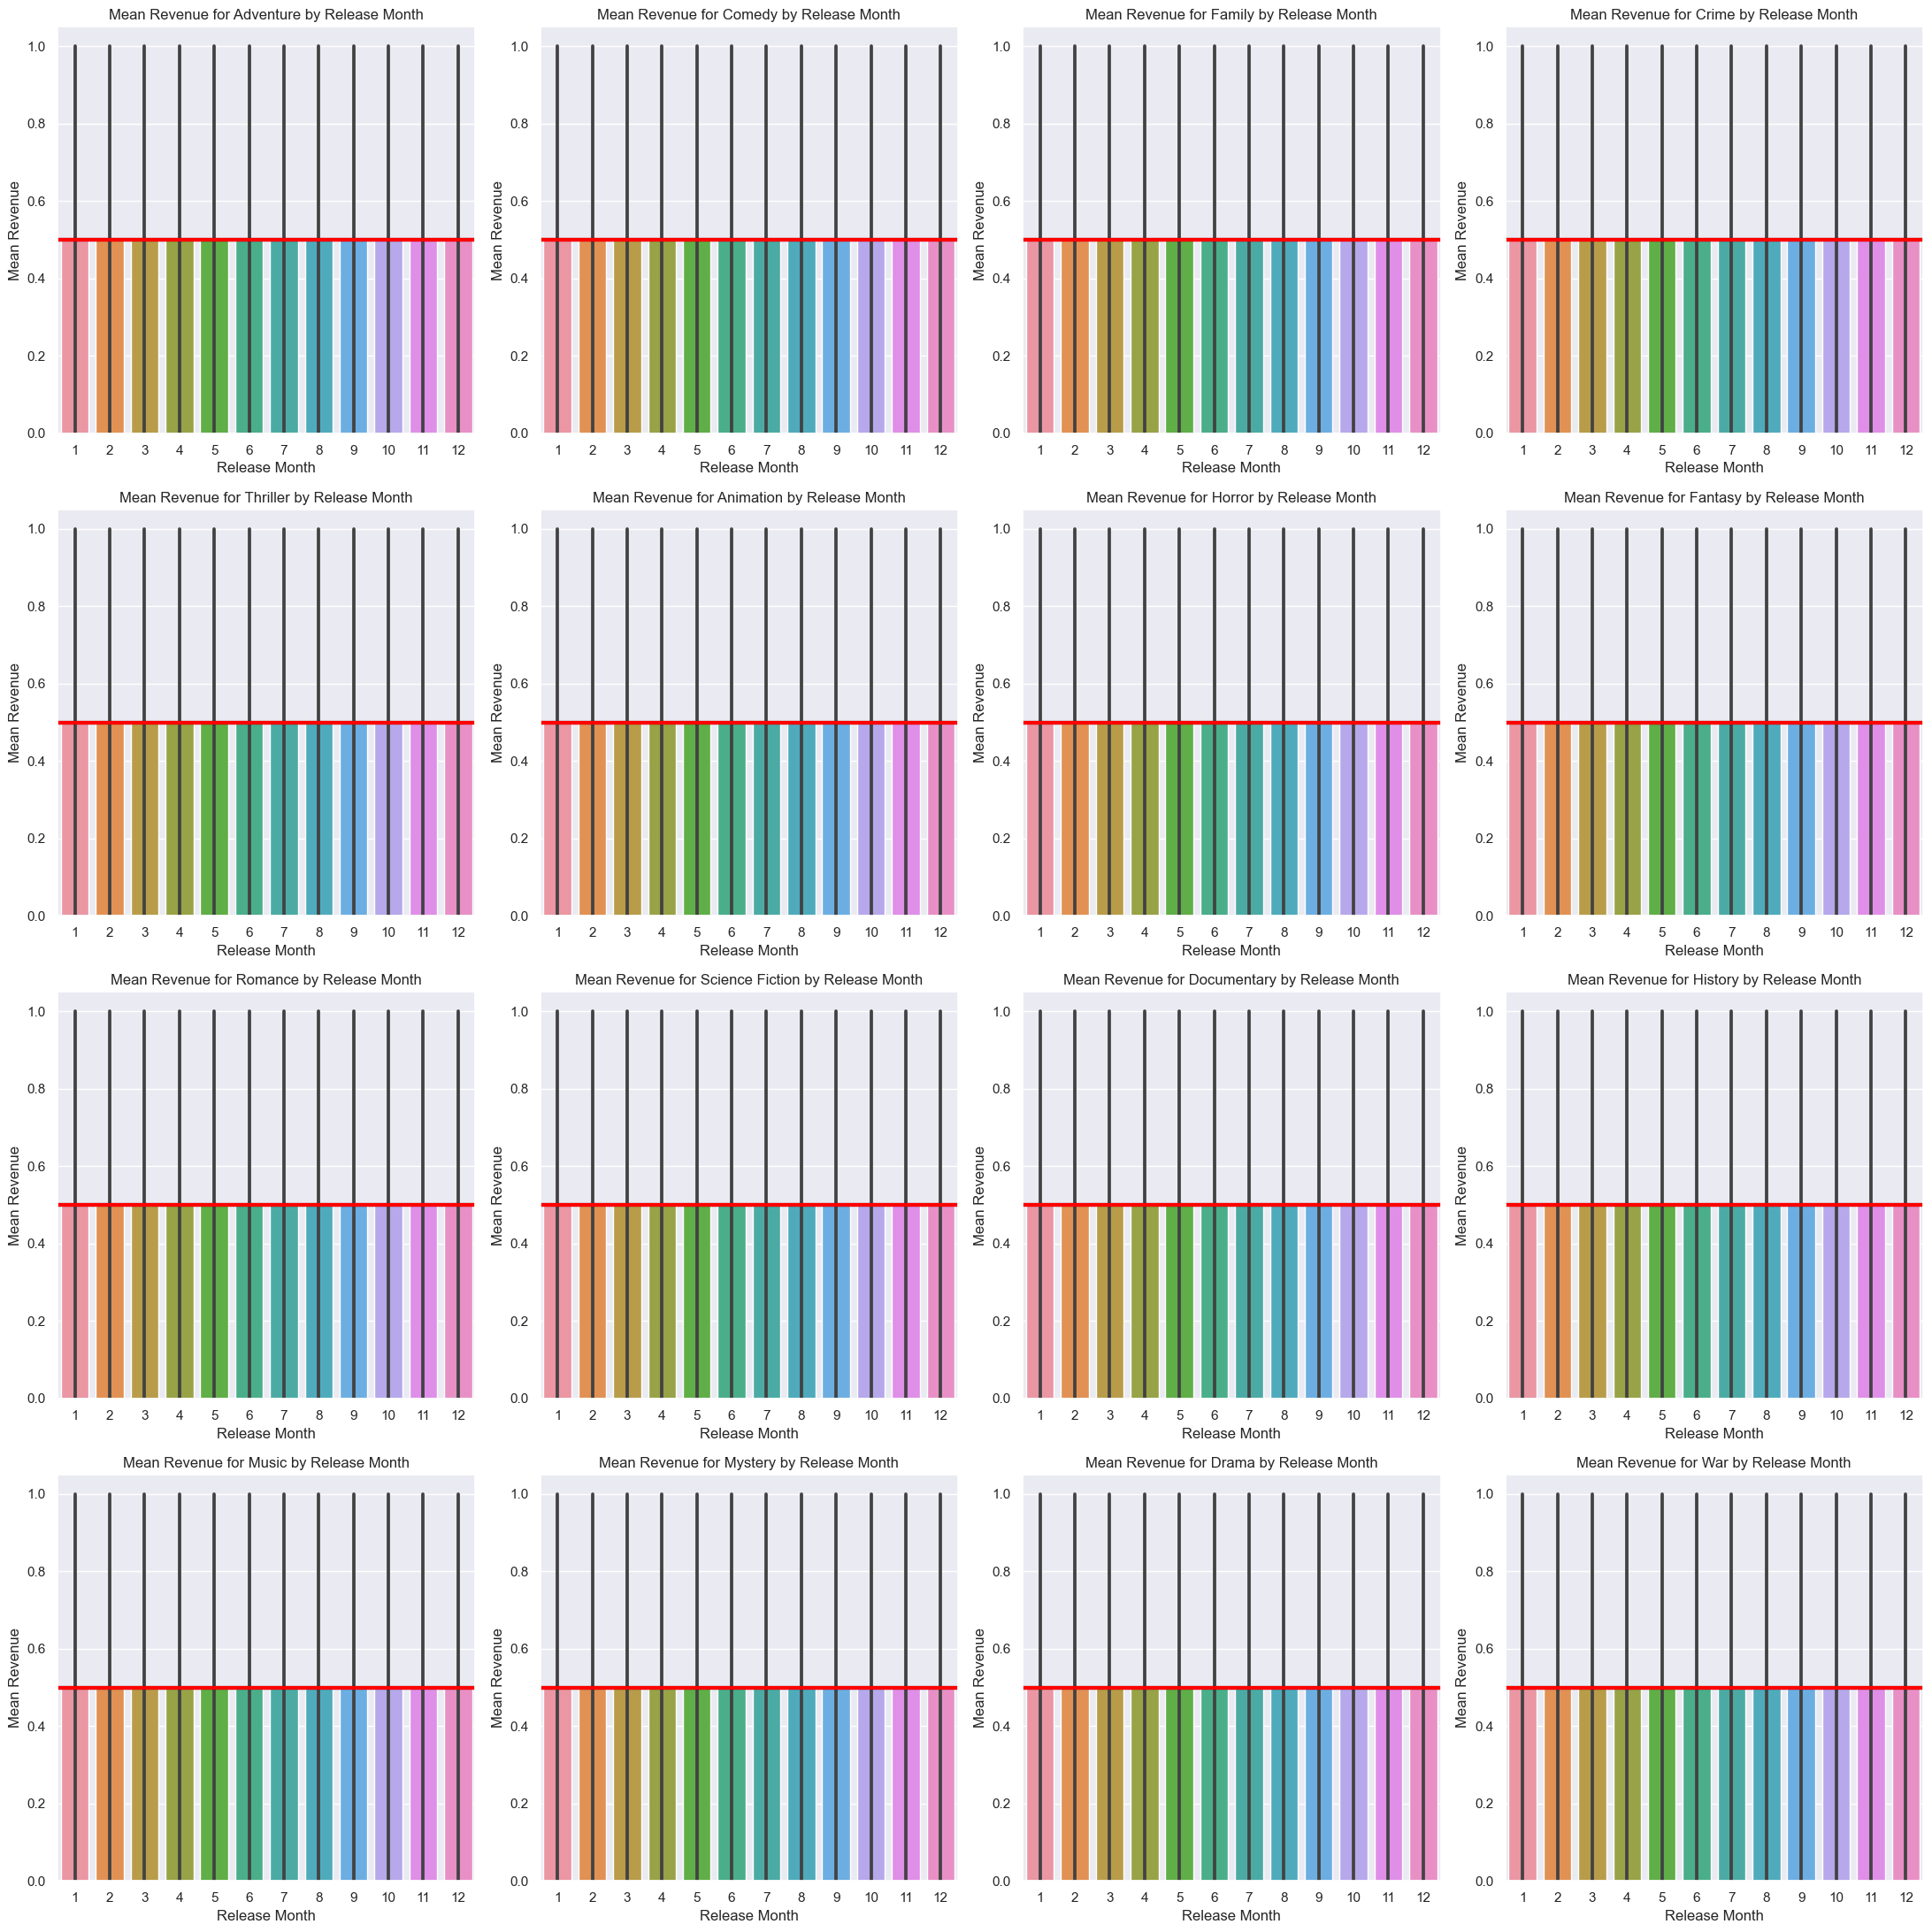

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Assuming you already have the merged_df as mentioned in the previous response.
# Additionally, let's assume you have a list of boolean genre columns like genre_list.

# Extract the month from the release_date column and create a new column for it.
imdb_df['Release_Month'] = pd.to_datetime(imdb_df['date_x']).dt.month


# Create a subplots grid for visualizing revenue for each genre over the course of the year.
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif',
              font_scale=1, color_codes=True, rc=None)

fig, axs = plt.subplots(4, 4, figsize=(22, 22))
y = 0
x = 0

for genre in genre_list:
    # Group the data by release month and calculate the mean revenue for each genre for each month.
    genre_monthly_revenue = imdb_df.groupby(['genre', 'Release_Month'])['profit'].mean().reset_index()
    
    sns.barplot(x='Release_Month', y=genre, data=genre_monthly_revenue, ax=axs[math.floor(x), y % 4])
    
   
    axs[math.floor(x),y%4].set_ylim(0, 0.5)
    
    axs[math.floor(x),y%4].axhline(y = genre_monthly_revenue[genre].mean(), color = 'black', lw = 3)
    axs[math.floor(x),y%4].axhline(y = genre_monthly_revenue[genre].median(), color = 'red', lw = 3)
    
    
    axs[math.floor(x), y % 4].set_xlabel('Release Month')
    axs[math.floor(x), y % 4].set_ylabel('Mean Revenue')
    axs[math.floor(x), y % 4].set_title(f'Mean Revenue for {genre} by Release Month')
    

    y += 1
    x += .25

# Adjust layout spacing
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have the merged_df as mentioned in the previous response.

# Extract the month from the release_date column and create a new column for it.
imdb_df['Release_Month'] = pd.to_datetime(imdb_df['date_x']).dt.month

# Create a scatter plot to compare Profit with the release month.
plt.figure(figsize=(12, 6))
sns.boxplot(data=imdb_df,x='Release_Month', y='revenue')
plt.title('Revenue vs. Release Month')
plt.xlabel('Release Month')
plt.ylabel('Revenue')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)

# Show the plot
plt.show()